In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch
from torchvision import models, datasets
from torch.autograd import Variable

#from data_utils.data_setup import get_imagenet_test, get_top_prediction, get_imagenet_classes
from techniques.gen_patch import gen_adversarial_patch
from metrics.utils import *
from techniques.utils import get_displ_img
#from techniques.generate_grounding import gen_grounding

datadir = '../data/test/'
#datadir = '../data/ILSVRC2012_img_val/'
save_path='../results/explanation_examples/'

In [7]:
from techniques.generate_grounding import gen_grounding, gen_grounding_gcam, gen_grounding_gcam_batch

In [8]:
displ_img = cv2.imread('/work/lisabdunlap/explain-eval/data/samples/cat_dog.png')

# Mask/Heatmap Methods

### Grad-Cam

result path: ./cat_dog/
model name  resnet18
	#0: boxer (0.42589)
saving explanation mask....

error saving explanation
saved to ./cat_dog/gcam-resnet18


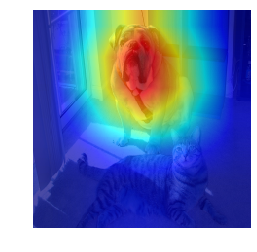

In [9]:
gcam_expl = gen_grounding(displ_img, 'gcam', 'cat_dog', 'resnet18', target_index=1, show=True, save=True, save_path='./', device=2)

In [5]:
gcam_expl = gen_grounding(displ_img, 'gcam', 'cat_dog', 'resnet18', target_index=243, show=True, save=True, save_path='./', device=5, index=True)

result path: ./cat_dog/
model name  resnet18


TypeError: gen_gcam_target() got an unexpected keyword argument 'show_labels'

### LIME

result path: /work/lisabdunlap/explain-eval/results/different_architectures/cat_dog/
lime classsification: 254
finished lime explanation
saving explanation mask....

saved to /work/lisabdunlap/explain-eval/results/different_architectures/cat_dog/lime-vgg19


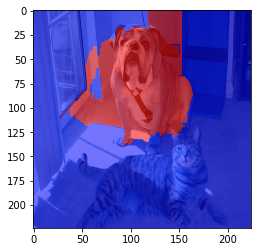

In [5]:
lime_expl= gen_grounding(displ_img, 'lime', 'cat_dog', 'resnet18', target_index=1, show=True, save=True, save_path='/work/lisabdunlap/explain-eval/results/different_architectures/')

### RISE

result path: ./cat_dog/


Generating filters:   1%|          | 38/6000 [00:00<00:15, 374.46it/s]

Current cuda device  0


Generating filters: 100%|██████████| 6000/6000 [00:15<00:00, 375.04it/s]


Masks are generated.
finished RISE
saving explanation mask....

error saving explanation
saved to ./cat_dog/rise-resnet18


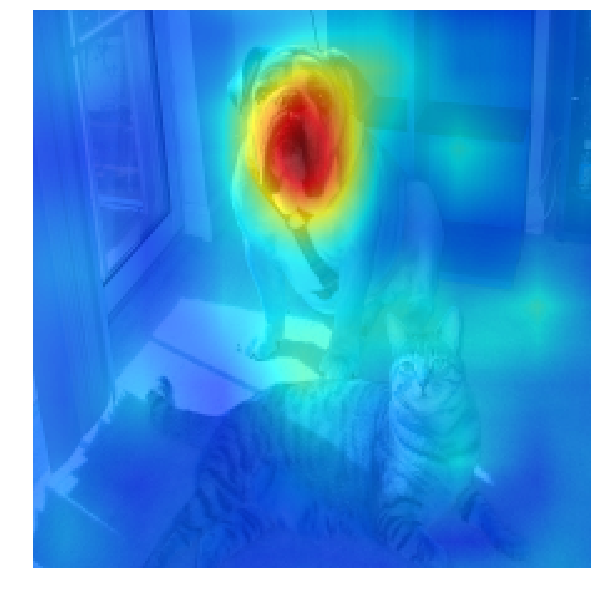

In [4]:
gcam_expl = gen_grounding(displ_img, 'rise', 'cat_dog', 'resnet18', target_index=3, show=True, save=True, save_path='./', device=5)

# Saliency Methods

### Integrated Gradients

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


finished Integrated Gradients explanation


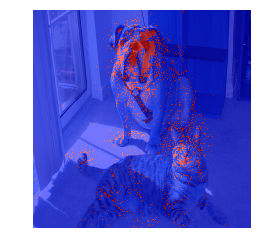

In [5]:
lime_expl= gen_grounding(displ_img, 'ig', 'cat_dog', 'vgg19', show=True, save=False, save_path='/work/lisabdunlap/explain-eval/results/different_architectures/')

result path: ../results/explanation_examples/white_car/white_car1/
integrated gradients clasification: convertible


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


finished Integrated Gradients explanation
saving explanation mask

saved to ../results/explanation_examples/white_car/white_car1/ig-vgg19
------------------------------


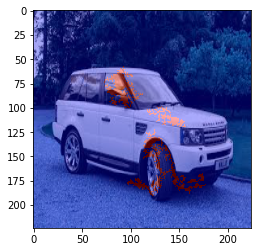

In [17]:
displ_img = cv2.imread('../data/samples/white_car.jpg')
displ_img = cv2.resize(displ_img, (224, 224))
ig_expl = gen_grounding(displ_img, 'vgg19', 'ig', 'white_car', show=True, save_path=save_path, label_index=i)

# Get Stats

In [56]:
iou_pix, cos_dist, js_dist, tvd, cc = get_stats(np.float32(ig_mask), lime_mask, threshold=10)

pixel count IoU: 0.004022191400832178
cos similarity: 0.8182256808217385
Jenson Shannon dist: 0.7215742216816708
total variation distance: 0.9933854557551773
Pearsons Correlation Coefficient: -0.05971653644705394
------------------------------


## Calculate IoU

In [ ]:
from techniques.utils import calc_iou, weight_mask

In [ ]:
iou, intersection, union = calc_iou(gcam_mask, lime_mask, threshold=50, num_pixels=True)
print("IoU pixel value sum: {0}".format(iou))

#### Check IoU

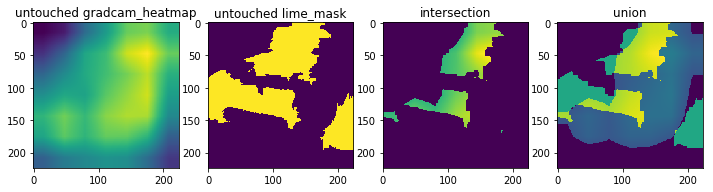

In [87]:
_, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()
imgs = [gcam_mask, lime_mask, intersection, union]
labels = ['untouched gradcam_heatmap', 'untouched lime_mask', 'intersection', 'union']
for img, ax, label in zip(imgs, axs, labels):
    ax.set_title(label)
    ax.imshow(img)
plt.show()